## 1. Exploratory data analysis


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use("ggplot")

In [2]:
df=pd.read_csv("youtubers_df.csv")

In [3]:
#1.data understanding
df.head(5)

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


In [4]:
df.shape


(1000, 9)

In [5]:
df.columns


Index(['Rank', 'Username', 'Categories', 'Suscribers', 'Country', 'Visits',
       'Likes', 'Comments', 'Links'],
      dtype='object')

In [6]:
df.dtypes

Rank            int64
Username       object
Categories     object
Suscribers    float64
Country        object
Visits        float64
Likes         float64
Comments      float64
Links          object
dtype: object

In [7]:
df.describe()

,Rank,Suscribers,Visits,Likes,Comments
count,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000
mean,500.500000,2.189440e+07,1.209446e+06,5.363259e+04,1288.768000
std,288.819436,1.682775e+07,5.229942e+06,2.580457e+05,6778.188308
min,1.000000,1.170000e+07,0.000000e+00,0.000000e+00,0.000000
25%,250.750000,1.380000e+07,3.197500e+04,4.717500e+02,2.000000
50%,500.500000,1.675000e+07,1.744500e+05,3.500000e+03,67.000000
75%,750.250000,2.370000e+07,8.654750e+05,2.865000e+04,472.000000
max,1000.000000,2.495000e+08,1.174000e+08,5.300000e+06,154000.000000


In [8]:
#analysis: 
#count row shows the number of non null values in each column
#mean gives mean of each column and soon

In [9]:
#identify key variable

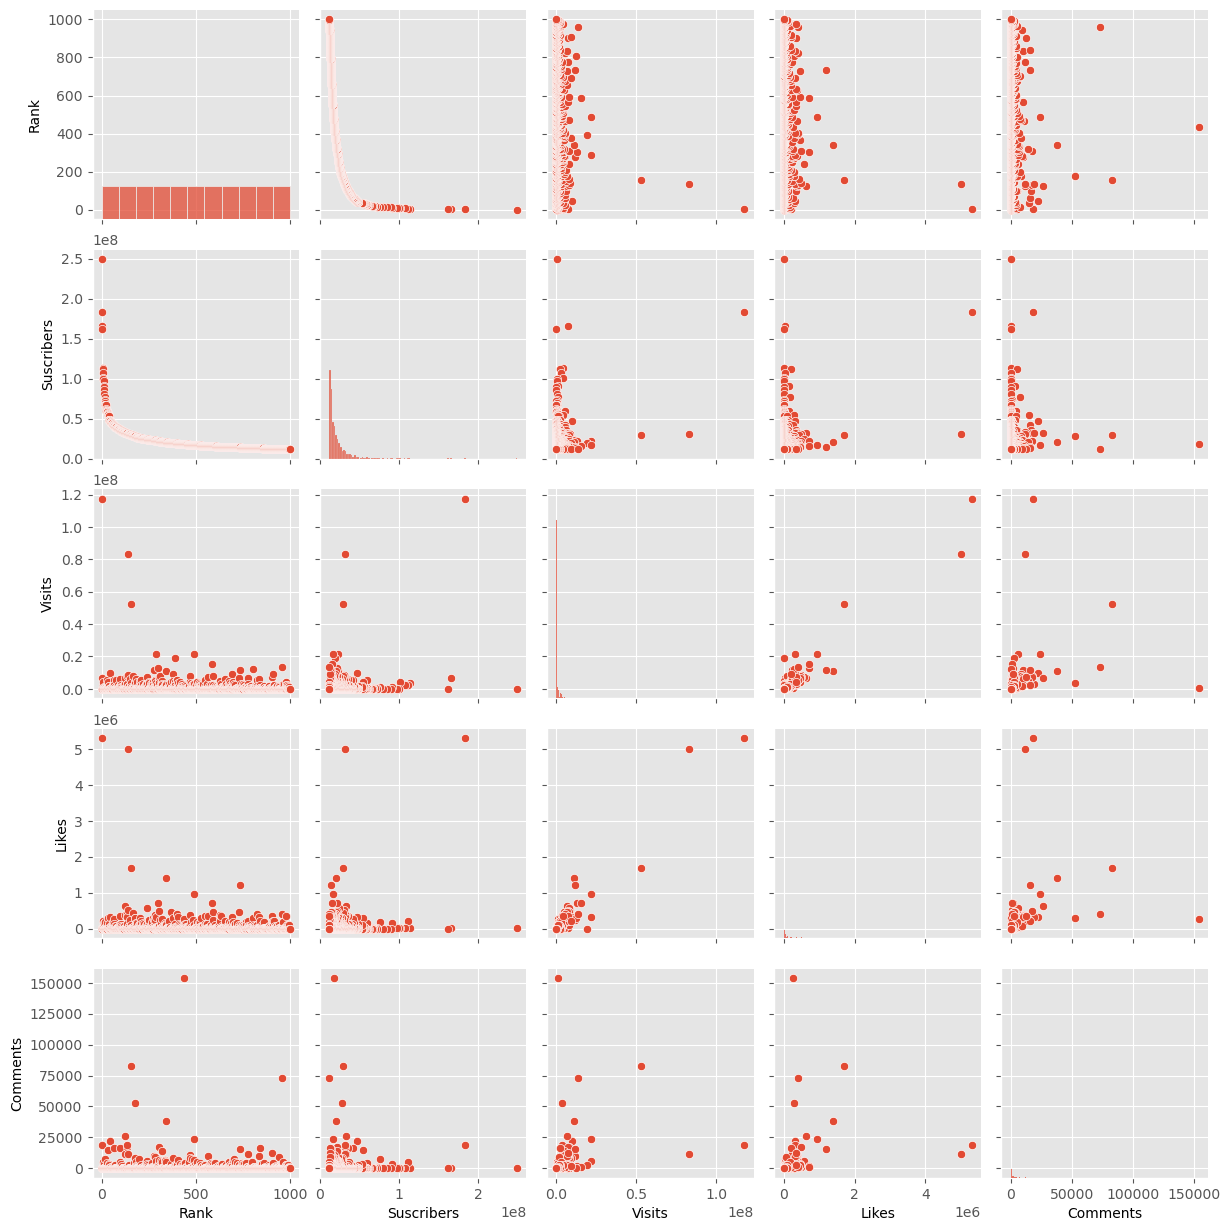

In [10]:
sns.pairplot(df)
plt.show()

In [11]:
#analysis key points:
#Bottom-Left to Top-Left: Negative correlation. This means that as one variable increases, the other tends to decrease.

#Bottom-Left to Bottom-Right: Positive correlation. This means that as one variable increases, the other also tends to increase.

#Bottom-Left to Top-Right: Positive correlation. This means that as one variable increases, the other tends to increase.

#Top-Left to Bottom-Right: Negative correlation. This means that as one variable increases, the other tends to decrease.


In [12]:
#2.CHECK  FOR MISSING DATA

In [13]:
df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of       Rank  Username  Categories  Suscribers  Country  Visits  Likes  \
0    False     False       False       False    False   False  False   
1    False     False       False       False    False   False  False   
2    False     False       False       False    False   False  False   
3    False     False        True       False    False   False  False   
4    False     False       False       False    False   False  False   
..     ...       ...         ...         ...      ...     ...    ...   
995  False     False        True       False    False   False  False   
996  False     False        True       False    False   False  False   
997  False     False       False       False    False   False  False   
998  False     False        True       False    False   False  False   
999  False     False       False       False    False   False  False   

     Comments  Links  
0       False  False  
1       False  False  
2   

In [14]:
#forward fill the missing values that is in Categories can also handle these missing values by backward fill or fill with mean etc
df['Categories']=df['Categories'].ffill()

In [15]:
df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of       Rank  Username  Categories  Suscribers  Country  Visits  Likes  \
0    False     False       False       False    False   False  False   
1    False     False       False       False    False   False  False   
2    False     False       False       False    False   False  False   
3    False     False       False       False    False   False  False   
4    False     False       False       False    False   False  False   
..     ...       ...         ...         ...      ...     ...    ...   
995  False     False       False       False    False   False  False   
996  False     False       False       False    False   False  False   
997  False     False       False       False    False   False  False   
998  False     False       False       False    False   False  False   
999  False     False       False       False    False   False  False   

     Comments  Links  
0       False  False  
1       False  False  
2   

In [16]:
#3.CHECK FOR OUTLIERS
#outliers are those values which is less than Q1-threshold*IQR and greater than Q3+threshold*IQR

In [20]:
#selecting only numeric values since there can be missing values which are nonnumeric
numeric_columns = df.select_dtypes(include=['number']).columns
Q1 = df[numeric_columns].quantile(0.25)
print(Q1)

Rank               250.75
Suscribers    13800000.00
Visits           31975.00
Likes              471.75
Comments             2.00
Name: 0.25, dtype: float64


In [21]:
numeric_columns = df.select_dtypes(include=['number']).columns
Q3 = df[numeric_columns].quantile(0.75)
print(Q3)

Rank               750.25
Suscribers    23700000.00
Visits          865475.00
Likes            28650.00
Comments           472.00
Name: 0.75, dtype: float64


In [22]:
threshold=1.5
IQR=Q3=Q1

In [23]:
outliers=(df<(Q1-threshold*IQR))|(df>(Q3+threshold*IQR)).any(axis=1)
print(outliers)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10292\3353706923.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers=(df<(Q1-threshold*IQR))|(df>(Q3+threshold*IQR)).any(axis=1)


     Categories  Comments  Country  Likes  Links   Rank  Suscribers  Username  \
0         False     False    False  False  False  False       False     False   
1         False     False    False  False  False  False       False     False   
2         False     False    False  False  False  False       False     False   
3         False     False    False  False  False  False       False     False   
4         False     False    False  False  False  False       False     False   
..          ...       ...      ...    ...    ...    ...         ...       ...   
995       False     False    False  False  False  False       False     False   
996       False     False    False  False  False  False       False     False   
997       False     False    False  False  False  False       False     False   
998       False     False    False  False  False  False       False     False   
999       False     False    False  False  False  False       False     False   

     Visits      0  ...    

## 2. Trend Analaysis


In [24]:
most_popular=df['Categories'].value_counts().idxmax()
print("Most popular category is : "+most_popular)

Most popular category is : Música y baile


In [25]:
correlation_likes=df['Suscribers'].corr(df['Likes'])
print(f"correlation between subscribes and likes:{correlation_likes} ")

correlation between subscribes and likes:0.21163868368008437 


In [26]:
correlation_comments=df['Suscribers'].corr(df['Comments'])
print(f"correlation between subscribes and likes:{correlation_comments} ")

correlation between subscribes and likes:0.036349826161054116 


In [27]:
#there is moderate positive relationship between suscribers and likes 
#there is very low positive relationship between suscribers and comments

## 3. Audience Study

In [28]:
# 1. check which countries are present in our dataset
unique_countries=df['Country'].unique()
print(unique_countries)

['India' 'Estados Unidos' 'Unknown' 'Brasil' 'México' 'Rusia' 'Pakistán'
 'Filipinas' 'Indonesia' 'Tailandia' 'Francia' 'Colombia' 'Iraq' 'Japón'
 'Ecuador' 'Argentina' 'Turquía' 'Arabia Saudita' 'El Salvador'
 'Bangladesh' 'Reino Unido' 'Argelia' 'España' 'Perú' 'Egipto' 'Jordania'
 'Marruecos' 'Singapur' 'Somalia']


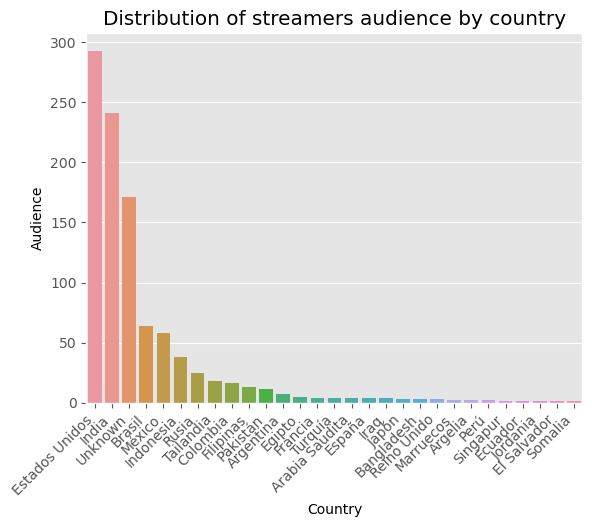

In [29]:
#2.plot the country vs audience by count method if any country is appearing lot of times then obviously its audeince are those 
#which is the number in yaxis cause the data is stored for each user so more the country appear more the audience
sns.countplot(x='Country',data=df,order=df['Country'].value_counts().index)
plt.xticks(rotation=45,ha='right')
plt.title("Distribution of streamers audience by country")
plt.xlabel('Country')
plt.ylabel('Audience')
plt.show()

In [30]:
 #check the regional preferences for specific content category


In [31]:
grouped_data=df.groupby('Country')
print(grouped_data)

In [32]:
#`for each region see the category 
category_counts=grouped_data['Categories'].value_counts()
print(category_counts)

Country         Categories               
Arabia Saudita  Música y baile               2
                Animación, Videojuegos       1
                Videojuegos, Humor           1
Argelia         Educación                    1
                Música y baile, Animación    1
                                            ..
Unknown         Comida y bebida              1
                Comida y bebida, Juguetes    1
                Música y baile, Juguetes     1
                Noticias y Política          1
                Películas, Videojuegos       1
Name: Categories, Length: 231, dtype: int64


In [33]:
#convert into percentage
#there are multiple categories in arabia saudita then category_counts.groupby('Country').transform('sum') this line sums 2+1+1..+1=4
category_percentage=category_counts/category_counts.groupby('Country').transform('sum')*100
print(category_percentage)

Country         Categories               
Arabia Saudita  Música y baile               50.000000
                Animación, Videojuegos       25.000000
                Videojuegos, Humor           25.000000
Argelia         Educación                    50.000000
                Música y baile, Animación    50.000000
                                               ...    
Unknown         Comida y bebida               0.584795
                Comida y bebida, Juguetes     0.584795
                Música y baile, Juguetes      0.584795
                Noticias y Política           0.584795
                Películas, Videojuegos        0.584795
Name: Categories, Length: 231, dtype: float64


In [34]:
category_percentage.info()


<class 'pandas.core.series.Series'>
MultiIndex: 231 entries, ('Arabia Saudita', 'Música y baile') to ('Unknown', 'Películas, Videojuegos')
Series name: Categories
Non-Null Count  Dtype  
--------------  -----  
231 non-null    float64
dtypes: float64(1)
memory usage: 4.0+ KB


## Performance Metrics

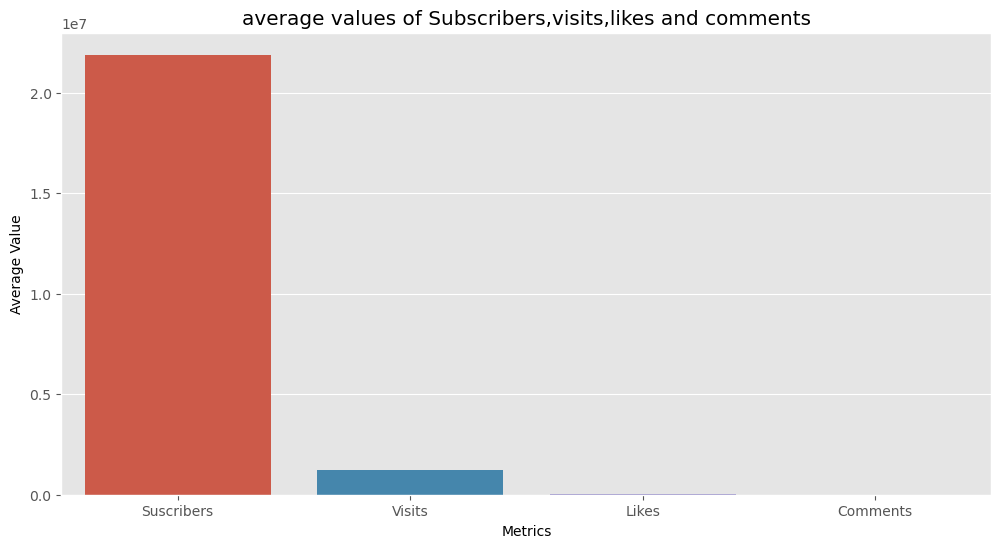

In [35]:
average_values=df[['Suscribers','Visits','Likes','Comments']].mean()
plt.figure(figsize=(12,6))
sns.barplot(x=average_values.index,y=average_values.values)
plt.title('average values of Subscribers,visits,likes and comments')
plt.xlabel('Metrics')
plt.ylabel('Average Value')
plt.show()



## 5. Content Categories

In [36]:
df.head()


,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,Educación,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


In [37]:
category_group=df.groupby('Categories')


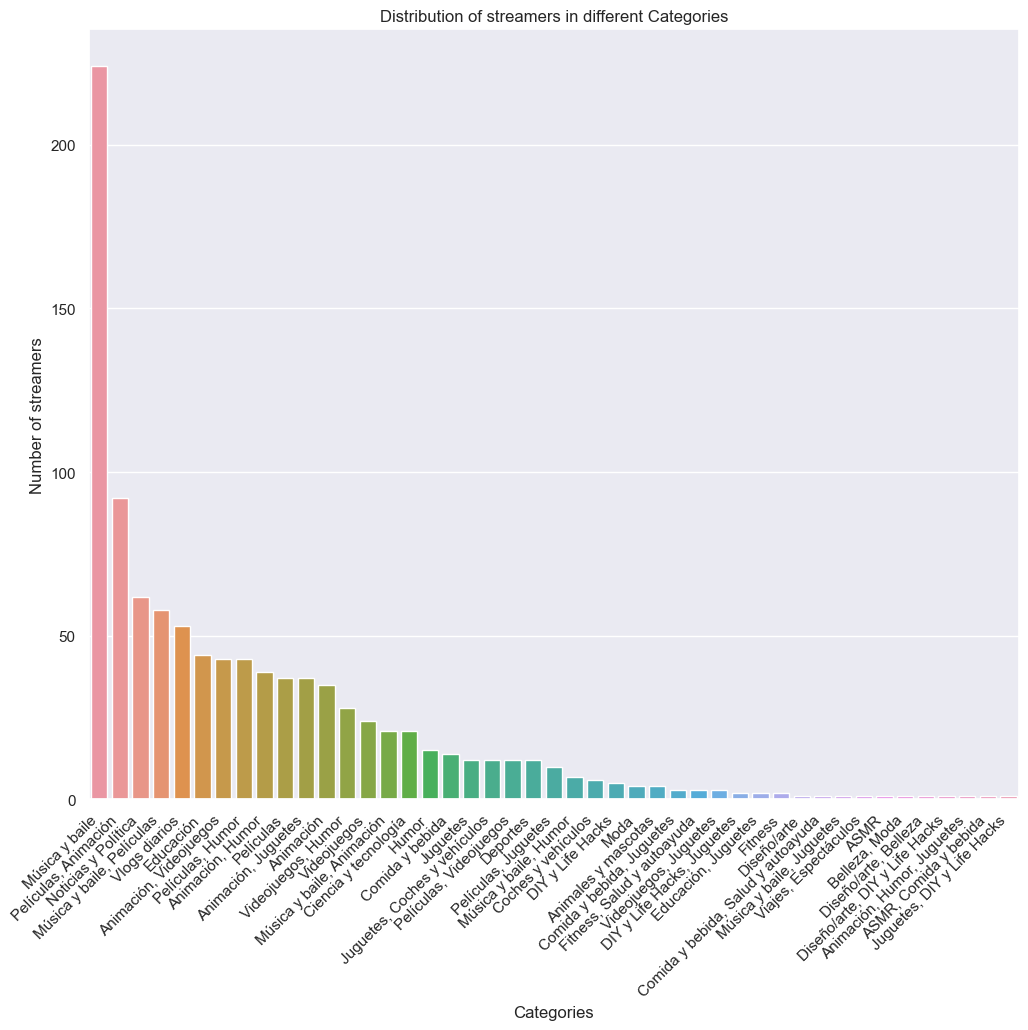

In [38]:
sns.set(rc={'figure.figsize':(12, 10)}) 
sns.countplot(x='Categories',data=df,order=df['Categories'].value_counts().index)
plt.xticks(rotation=45,ha='right')
plt.title("Distribution of streamers in different Categories")
plt.xlabel('Categories')
plt.ylabel('Number of streamers')
plt.show()

## 6. Brands and Collaborations

In [39]:
df.head()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,Educación,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


Text(0.5, 1.0, 'streamers with high performance metrics v/s brand collaborations')

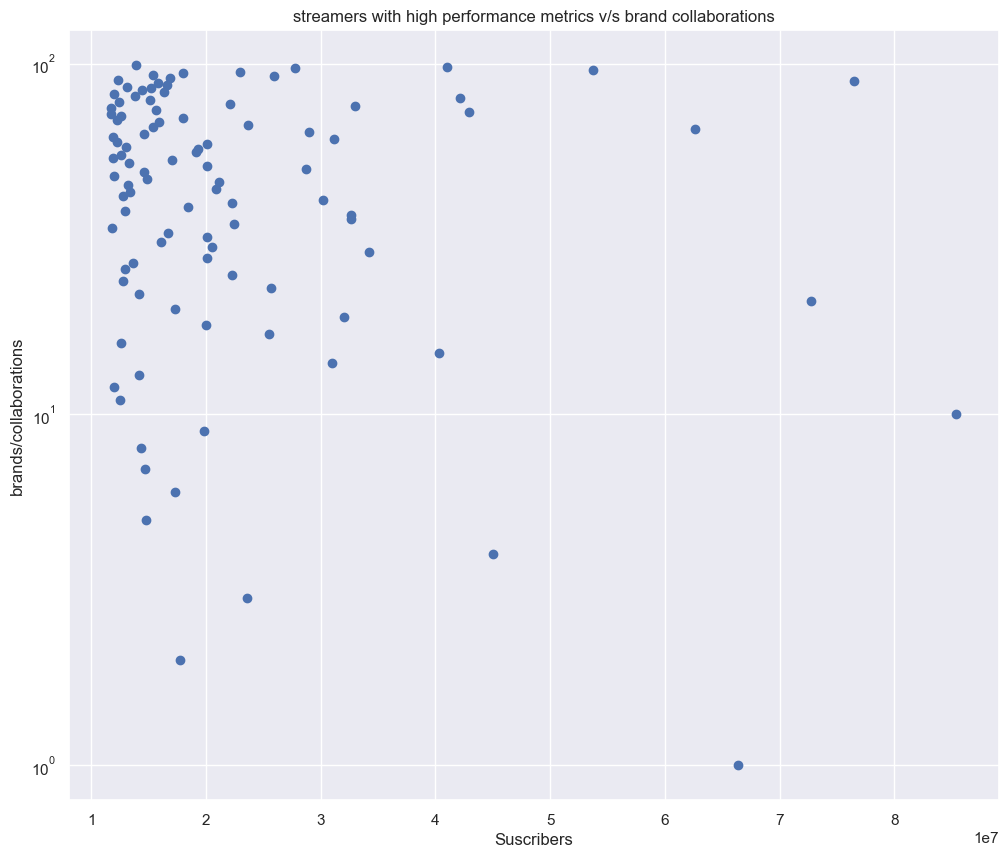

In [40]:
sampled_df=df.sample(n=100)
plt.scatter(x='Suscribers',y='Links',data=sampled_df)
plt.xlabel('Suscribers')
plt.ylabel('brands/collaborations')
plt.yscale('log')  # Set y-axis to a logarithmic scale
plt.title('streamers with high performance metrics v/s brand collaborations')

## Benchmarking

In [41]:
average_values=df[['Suscribers','Visits','Likes','Comments']].mean()


In [42]:
above_average_streamers=df[(df['Suscribers']>average_values['Suscribers']) &
                           (df['Visits']>average_values['Visits']) &
                           (df['Likes']>average_values['Likes']) &
                           (df['Comments']>average_values['Comments']) ]

In [43]:
print(above_average_streamers)

     Rank               Username                     Categories   Suscribers  \
1       2                MrBeast             Videojuegos, Humor  183500000.0   
5       6              PewDiePie         Películas, Videojuegos  111500000.0   
26     27            dudeperfect                    Videojuegos   59700000.0   
34     35            TaylorSwift                 Música y baile   54100000.0   
39     40            JuegaGerman           Películas, Animación   48600000.0   
43     44               A4a4a4a4               Animación, Humor   47300000.0   
58     59              Mikecrack           Películas, Animación   43400000.0   
62     63         KimberlyLoaiza                 Música y baile   42100000.0   
64     65        luisitocomunica                 Música y baile   41100000.0   
70     71            JessNoLimit           Películas, Animación   39600000.0   
96     97         TotalGaming093         Películas, Videojuegos   36300000.0   
98     99   TechnoGamerzOfficial        

In [44]:
#2. top-performing content creators

In [45]:
df['top_performer_rank']=df['Visits'].rank(ascending=False,method='dense')

In [46]:
top_performers=df[df['top_performer_rank']<=10]
print(top_performers)

     Rank               Username              Categories   Suscribers  \
1       2                MrBeast      Videojuegos, Humor  183500000.0   
136   137               MrBeast2           Vlogs diarios   31300000.0   
153   154              DaFuqBoom        Animación, Humor   29800000.0   
278   279            StokesTwins      Videojuegos, Humor   22700000.0   
288   289  VillageCookingChannel  Películas, Videojuegos   22500000.0   
300   301           alfredolarin        Películas, Humor   21900000.0   
390   391            jaanvipatel             Videojuegos   19100000.0   
488   489      BeastPhilanthropy         Comida y bebida   16900000.0   
586   587               _vector_     Noticias y Política   15400000.0   
734   735                Mythpat               Animación   13900000.0   
805   806                NickPro                Deportes   13200000.0   
958   959                dojacat          Música y baile   11900000.0   

            Country       Visits      Likes  Comme

## 8. Content Recommendation

In [47]:
df.head(10)

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links,top_performer_rank
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...,440.0
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...,1.0
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...,22.0
3,4,SETIndia,Educación,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...,623.0
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...,43.0
5,6,PewDiePie,"Películas, Videojuegos",111500000.0,Estados Unidos,2400000.0,197300.0,4900.0,http://youtube.com/channel/UC-lHJZR3Gqxm24_Vd_...,57.0
6,7,LikeNastyaofficial,Juguetes,107500000.0,Unknown,2600000.0,28000.0,0.0,http://youtube.com/channel/UCJplp5SjeGSdVdwsfb...,55.0
7,8,VladandNiki,"Animación, Juguetes",101400000.0,Unknown,4100000.0,22100.0,0.0,http://youtube.com/channel/UCvlE5gTbOvjiolFlEm...,41.0
8,9,zeemusiccompany,Música y baile,99700000.0,India,74300.0,2600.0,32.0,http://youtube.com/channel/UCFFbwnve3yF62-tVXk...,461.0
9,10,WWE,Videojuegos,97200000.0,Estados Unidos,184500.0,6300.0,214.0,http://youtube.com/channel/UCJ5v_MCY6GNUBTO8-D...,323.0


In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Sample data (replace with your actual data)


df = pd.DataFrame(df)

# Combine relevant text features
df['Features'] = df['Categories'] + ' ' + df['Suscribers'].astype(str) + ' ' + df['Visits'].astype(str) + ' ' + df['Likes'].astype(str)
print(df['Features'])



0              Música y baile 249500000.0 86200.0 2700.0
1      Videojuegos, Humor 183500000.0 117400000.0 530...
2                Educación 165500000.0 7000000.0 24700.0
3                    Educación 162600000.0 15600.0 166.0
4      Animación, Juguetes 113500000.0 3900000.0 12400.0
                             ...                        
995                Educación 11700000.0 397400.0 14000.0
996               Educación 11700000.0 1100000.0 92500.0
997             Música y baile 11700000.0 211400.0 745.0
998               Música y baile 11700000.0 14000.0 81.0
999           Noticias y Política 11700000.0 2200.0 31.0
Name: Features, Length: 1000, dtype: object


In [49]:
# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english') #common English stop words (e.g., "the", "and", "is") should be
#removed from the input text during the TF-IDF vectorization process. 

# Fit and transform the TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Features'])
print(tfidf_matrix)


  (0, 599)	0.4483361129327671
  (0, 1398)	0.6053771063677501
  (0, 548)	0.6053771063677501
  (0, 1505)	0.18170284534364972
  (0, 1524)	0.18170284534364972
  (1, 1088)	0.482314099376259
  (1, 84)	0.5689377061818525
  (1, 338)	0.5689377061818525
  (1, 1519)	0.237405241128081
  (1, 1532)	0.2522531149398358
  (2, 540)	0.5583933840541158
  (2, 1255)	0.5270157030018032
  (2, 268)	0.5583933840541158
  (2, 1515)	0.3140829605035918
  (3, 269)	0.5699388563806724
  (3, 230)	0.49756384364762796
  (3, 256)	0.5699388563806724
  (3, 1515)	0.32057701332063915
  (4, 110)	0.5256068186217966
  (4, 868)	0.5569006169274212
  (4, 65)	0.5569006169274212
  (4, 1520)	0.2675138806783892
  (4, 1500)	0.17859787679134803
  (5, 387)	0.5709994758560377
  (5, 520)	0.4984897778893491
  :	:
  (994, 82)	0.43685005221422685
  (994, 1515)	0.34932288112891247
  (995, 890)	0.6168292399184233
  (995, 173)	0.557575262663598
  (995, 82)	0.4338847869478576
  (995, 1515)	0.346951735696036
  (996, 1439)	0.6509941496537979
  (996,

In [50]:
# Calculate cosine similarity
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Function to get content recommendations for a given username
def get_recommendations(username, cosine_sim=cosine_sim):
    # Find the index of the user
    idx = df.index[df['Username'] == username].tolist()[0]

    # Get the pairwise similarity scores with other users
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the users based on similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the indices of the top 5 similar users
    sim_indices = [i[0] for i in sim_scores[1:6]]

    # Return the top 5 similar users
    return df['Username'].iloc[sim_indices]

# Example: Get recommendations for 'MrBeast'
recommendations = get_recommendations('MrBeast')
print(recommendations)

26        dudeperfect
62     KimberlyLoaiza
825      mariano_razo
77             shfa-1
673        TommyInnit
Name: Username, dtype: object


In [ ]:
****INSIGHTS****

1.Exploratory data analysis
RANK is the key identifier since it shows persistent positive correlation with other categories in scatterplot
The analysis revealed missing values in the "Categories" section. However, no outliers were detected, indicating that the 
data is relatively consistent and does not exhibit extreme values. Addressing the missing values in the "Categories" section
is crucial for a comprehensive understanding of content distribution and audience preferences across different genres, guiding
further data refinement.

2.Trend Analaysis
Most Popular Category: The most popular content category is "Música y baile."

Subscriber-Like Relationship: A moderate positive relationship exists between the number of subscribers and likes, suggesting
    that content with more subscribers tends to receive a higher number of likes.

Subscriber-Comment Relationship: There is a very low positive relationship between the number of subscribers and comments, 
    indicating that higher subscriber counts are only weakly associated with increased comments.

3.Audience Study
Analysis shows that certainly there are regional preferences when it comes to prefering the content,Arabia Saudita demonstrates
a diverse content palette, favoring "Música y baile," "Animación, Videojuegos," and "Videojuegos, Humor." In contrast, Argelia
leans heavily towards "Educación" and a fusion of "Música y baile" with "Animación." Global trends emerge with minimal presence
in categories like "Películas, Videojuegos" and "Noticias y Política."


4. Performance Metrics
Insight: Limited Engagement Metrics
Observation:

A notable observation is the absence of average values for likes and comments, along with sparse instances of average values
for views in the dataset.
Implications:
This suggests that a considerable number of streamers may not be receiving consistent interactions or high view counts. 
This could be due to factors such as content type, audience targeting, or engagement strategies.

Recommendation:
To enhance engagement, explore the content and strategies of streamers with successful interaction patterns. Identifying 
commonalities among high-performing streamers can guide others in optimizing their content and engagement approaches.

5.Content Categories
The bar plot illustrates the distribution of streamers across different categories. Notably, the category "Música y baile" 
emerges as a major hub, hosting more than 200 streamers. This indicates a substantial presence of content creators in the music
and dance genre, showcasing the platform's diverse offerings in this vibrant category.

There are two categories: Música y baile and Películas, Animación with exceptional performance metrics

6.Brands and Collaborations
The analysis reveals a robust positive correlation, indicating that streamers with higher performance metrics, such as 
subscribers, likes, and comments, are more likely to receive lucrative brand collaborations and marketing campaign offers.
This suggests that brands prefer to partner with influencers who have a larger and more engaged audience, leveraging the 
streamers' reach and impact for effective promotional campaigns.

7.Benchmarking
above average performers(on the basis of likes,visits,subscribers):
    In the above average perfomers,, MrBeast stands out with 183.5 million subscribers, dominating the Video Games and Humor
    category. PewDiePie follows closely with 111.5 million subscribers, exploring content in Movies, Video Games. Other notable
    creators include dudeperfect, TaylorSwift, and JuegaGerman across various engaging categories.
    
top performers(on the basis of views only):
    MrBeast, a gaming and humor content creator, leads with 183.5 million subscribers. MrBeast2 follows with 31.3 million 
    daily vlog enthusiasts. DaFuqBoom's animation and humor have garnered 29.8 million subscribers. StokesTwins (22.7M) 
    and VillageCookingChannel (22.5M) excel in gaming and humor, and movies and gaming, respectively, showcasing diverse
    content strategies and significant audience reach

8.Content Recommendations
system is able to sucessfully recommend content to youtube users based on streamers categories and performance metrics


